In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:

plt.style.use("ggplot")
plt.rcParams['font.size']=25

In [3]:
import yaml
import pandas as pd
with open('/workspace/vllm_demo/results/benchmark_runtime.yaml', 'r') as f:
    data = pd.DataFrame.from_dict(yaml.load(f.read(), Loader=yaml.Loader))

In [4]:
data["ttftpt"] = data.ttft / data.len

Text(0.5, 0, '# of input tokens')

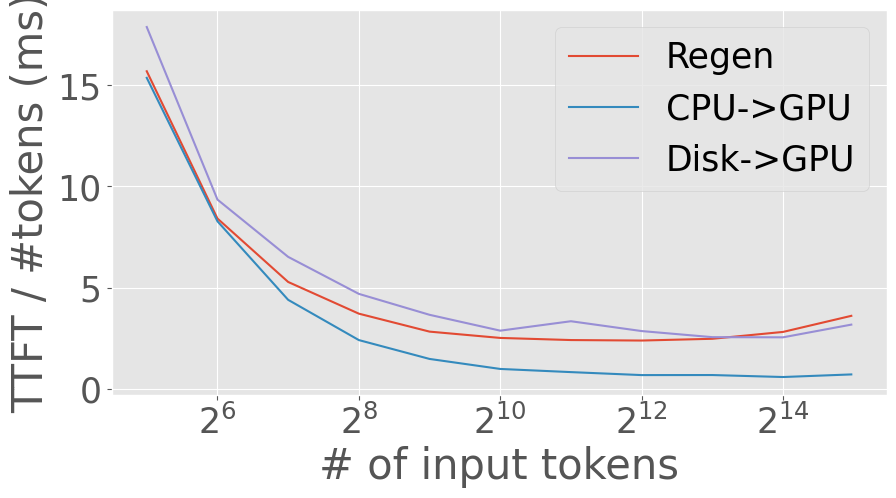

In [5]:


fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xscale("log", base=2)

regen = data[data.method=="regen"]
cpu = data[data.method=="cpu"]
disk = data[data.method=="disk"]

ax.plot(16 * regen.groupby("len").len.mean(), 1000 * regen.groupby("len").ttftpt.mean(), label="Regen")
ax.plot(16 * cpu.groupby("len").len.mean(), 1000 * cpu.groupby("len").ttftpt.mean(), label="CPU->GPU")
ax.plot(16 * disk.groupby("len").len.mean(), 1000 * disk.groupby("len").ttftpt.mean(), label="Disk->GPU")

ax.legend()

ax.set_ylabel('TTFT / #tokens (ms)')
ax.set_xlabel('# of input tokens')

In [27]:
regen.groupby("len")

In [16]:
regen

,len,method,ttft
0,2,regen,0.037820
1,2,regen,0.038241
2,2,regen,0.034806
3,2,regen,0.034172
4,2,regen,0.036993
...,...,...,...
272,1024,regen,2.879935
273,1024,regen,2.888728
274,1024,regen,2.894291
275,1024,regen,2.885735
